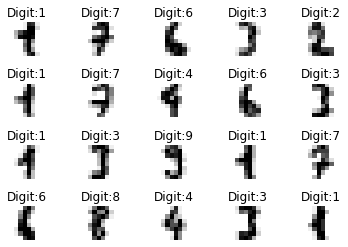

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()

for n,(label, img) in enumerate(zip(digits.target[80:100], digits.images[80:100])):
    ax = plt.subplot(4, 5, n+1)  # 2行五列で認識させる　ナンバーは１からはじまるので＋１
    plt.axis('off')
    plt.subplots_adjust(hspace=0.8
                        ,wspace=0.8)
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Digit:{0}'.format(label))  # set_titleでもplt.titleでもどっちでもよさげ
    plt.title('Digit:{0}'.format(label))
plt.show()

In [2]:
import numpy as np
from sklearn import datasets

digits=datasets.load_digits()
# 3と8にあたる要素だけをTrueにした配列を得る
flag_3_8=(digits.target==3)+(digits.target==8)

# digits.imagesの中からflag_3_8でTrueになってる要素だけまとめて抜き出しリスト化
images=digits.images[flag_3_8]
# imagesと符合する番号の配列をにしておく（3と8だけの配列）
labels=digits.target[flag_3_8]
# print(images.shape)
# print(images)
# 大項目に入っていた8*8=64の要素をまとめた2次元配列にする
images=images.reshape(images.shape[0],-1)

# Bool値の配列のTrue部分だけの要素数
n_samples=len(flag_3_8[flag_3_8])
train_size=int(n_samples*3/5)

# 「決定木」というアルゴリズムで分類できる
from sklearn import tree
classifier=tree.DecisionTreeClassifier()
classifier.fit(images[:train_size],labels[:train_size])

from sklearn import metrics
expected=labels[train_size:]
predicted=classifier.predict(images[train_size:])
print('Accuracy:\n',
      metrics.accuracy_score(expected,predicted))

Accuracy:
 0.8531468531468531


In [3]:
import numpy as np
from sklearn import datasets
digits=datasets.load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [4]:
digits.target[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
digits.images[:10]

array([[[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
        [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
        [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]],

       [[ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.],
        [ 0.,  0.,  3., 16., 15., 14.,  0.,  0.],
        [ 0.,  0.,  8., 13.,  8., 16.,  0.,  0.],
        [ 0.,  0.,  1.,  6., 15., 11.,  0.,  0

In [6]:
digits.images.shape

(1797, 8, 8)

In [7]:
# flag_3_8 [+]はor　==3または==8
(digits.target==3)+(digits.target==8)

array([False, False, False, ...,  True, False,  True])

In [8]:
flag_3_8=(digits.target==3)+(digits.target==8)
#images=　マスキング
digits.images[flag_3_8]

array([[[ 0.,  0.,  7., ...,  1.,  0.,  0.],
        [ 0.,  8., 13., ...,  4.,  0.,  0.],
        [ 0.,  2.,  1., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ..., 10.,  8.,  0.],
        [ 0.,  0.,  8., ..., 14.,  9.,  0.],
        [ 0.,  0.,  7., ...,  9.,  0.,  0.]],

       [[ 0.,  0.,  9., ...,  1.,  0.,  0.],
        [ 0.,  0., 12., ..., 12.,  0.,  0.],
        [ 0.,  0.,  9., ..., 15.,  4.,  0.],
        ...,
        [ 0.,  3., 16., ..., 13.,  2.,  0.],
        [ 0.,  1., 15., ..., 16.,  8.,  0.],
        [ 0.,  0., 11., ..., 11.,  1.,  0.]],

       [[ 0.,  2.,  9., ...,  9.,  3.,  0.],
        [ 0.,  4., 13., ..., 16.,  8.,  0.],
        [ 0.,  0.,  0., ..., 15.,  3.,  0.],
        ...,
        [ 0.,  0.,  0., ..., 15.,  4.,  0.],
        [ 0.,  1.,  5., ..., 16.,  6.,  0.],
        [ 0.,  2., 12., ..., 11.,  0.,  0.]],

       ...,

       [[ 0.,  0.,  5., ...,  0.,  1.,  0.],
        [ 0.,  0., 11., ..., 13.,  6.,  0.],
        [ 0.,  0.,  2., ..., 12.,  1.,  0.

In [9]:
#target=  マスキング
digits.target[flag_3_8]

array([3, 8, 3, 8, 3, 8, 8, 8, 3, 8, 3, 3, 3, 3, 8, 3, 3, 3, 8, 3, 3, 8,
       8, 8, 8, 8, 3, 8, 3, 8, 3, 8, 8, 8, 3, 8, 3, 3, 3, 3, 8, 3, 3, 3,
       8, 3, 3, 8, 8, 8, 8, 8, 3, 8, 3, 8, 3, 8, 8, 8, 3, 8, 3, 3, 3, 3,
       8, 3, 3, 3, 8, 3, 3, 8, 8, 8, 8, 3, 3, 8, 3, 8, 3, 8, 8, 8, 3, 8,
       3, 3, 3, 3, 8, 3, 3, 3, 8, 3, 3, 8, 8, 8, 8, 8, 3, 8, 3, 8, 3, 8,
       8, 8, 3, 8, 3, 3, 3, 3, 8, 3, 3, 3, 8, 3, 3, 8, 8, 8, 8, 8, 3, 8,
       3, 8, 3, 8, 8, 8, 3, 8, 3, 3, 3, 3, 8, 3, 3, 3, 8, 3, 3, 8, 8, 8,
       8, 8, 3, 8, 3, 8, 3, 8, 8, 8, 3, 8, 3, 3, 3, 3, 8, 3, 3, 3, 8, 3,
       3, 8, 8, 8, 8, 8, 3, 8, 3, 8, 3, 8, 8, 8, 3, 8, 3, 3, 3, 3, 8, 3,
       3, 3, 8, 3, 3, 8, 8, 8, 3, 8, 3, 8, 3, 8, 8, 8, 3, 8, 3, 3, 3, 3,
       8, 3, 3, 3, 8, 3, 3, 8, 8, 8, 8, 8, 3, 8, 3, 8, 3, 8, 8, 8, 3, 8,
       3, 3, 3, 3, 8, 3, 3, 3, 8, 3, 3, 8, 8, 8, 8, 8, 3, 8, 3, 8, 3, 8,
       8, 8, 3, 8, 3, 3, 3, 3, 8, 3, 3, 3, 8, 3, 3, 8, 8, 8, 8, 3, 8, 3,
       8, 3, 8, 8, 8, 3, 8, 3, 3, 3, 3, 8, 3, 3, 3,

In [10]:
digits.images[flag_3_8].shape
# ３５７個の箱の中に8行8列

(357, 8, 8)

In [11]:
digits.target[flag_3_8].shape
# ３５７個の要素

(357,)

In [12]:

images=digits.images[flag_3_8]
labels=digits.target[flag_3_8]
357*3/5
# ３または８にはまるデータの中でも3/5だけ使ってテストデータを作る
# 214個

214.2

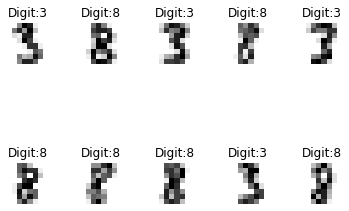

In [13]:
import matplotlib.pyplot as plt
for n,(label,img) in enumerate(zip(labels[:10],images[:10])):
    plt.subplot(2,5,n+1)
    plt.axis('off')
    plt.subplots_adjust(hspace=0.8
                        ,wspace=0.8)
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Digit:{0}'.format(label))
plt.show()

In [14]:
# 分類器を生成する
from sklearn import tree
classifier=tree.DecisionTreeClassifier()
train_size=int(len(flag_3_8[flag_3_8])*3/5)

In [15]:
# ２次元に落とさないと処理ができないのでimages（357,8,8）8行8列を357,64 にする
images=images.reshape(images.shape[0],-1)
classifier.fit(images[:train_size],labels[:train_size])
classifier.fit(images[:train_size],labels[:train_size])
classifier.fit(images[:train_size],labels[:train_size])
classifier.predict(images[train_size:])

array([3, 8, 3, 3, 3, 3, 8, 3, 3, 8, 8, 3, 3, 8, 8, 8, 8, 8, 3, 8, 3, 8,
       3, 8, 8, 8, 8, 8, 3, 3, 3, 3, 8, 3, 3, 3, 8, 3, 3, 8, 8, 8, 8, 8,
       3, 8, 3, 8, 3, 8, 8, 8, 3, 8, 3, 3, 3, 3, 8, 3, 3, 3, 8, 3, 3, 8,
       8, 8, 8, 3, 8, 3, 8, 3, 3, 8, 8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8,
       3, 3, 8, 8, 8, 8, 8, 3, 8, 3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3,
       3, 3, 8, 3, 3, 8, 8, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 8, 8,
       8, 3, 8, 8, 8, 3, 8, 8, 8, 8, 8])

In [16]:
labels[train_size:]

array([3, 8, 3, 3, 3, 3, 8, 3, 3, 3, 8, 3, 3, 8, 8, 8, 8, 8, 3, 8, 3, 8,
       3, 8, 8, 8, 3, 8, 3, 3, 3, 3, 8, 3, 3, 3, 8, 3, 3, 8, 8, 8, 8, 8,
       3, 8, 3, 8, 3, 8, 8, 8, 3, 8, 3, 3, 3, 3, 8, 3, 3, 3, 8, 3, 3, 8,
       8, 8, 8, 3, 8, 3, 8, 3, 8, 8, 8, 3, 8, 3, 3, 3, 3, 8, 3, 3, 3, 8,
       3, 3, 8, 8, 8, 8, 8, 3, 8, 3, 3, 8, 8, 8, 3, 8, 3, 3, 3, 3, 8, 3,
       3, 3, 8, 3, 3, 8, 8, 3, 8, 3, 8, 3, 8, 8, 8, 3, 8, 3, 3, 3, 3, 8,
       3, 3, 3, 8, 3, 3, 8, 8, 8, 8, 8])

In [17]:
from sklearn import metrics
expected=labels[train_size:]
predicted=classifier.predict(images[train_size:])
metrics.accuracy_score(expected,predicted)
# 正答率

0.8671328671328671

In [18]:
flag_3=(labels[train_size:]==3)
len(flag_3[flag_3])

75

In [19]:
flag_8=(labels[train_size:]==8)
len(flag_8[flag_8])

68

In [20]:
metrics.confusion_matrix(expected,predicted)

array([[59, 16],
       [ 3, 65]], dtype=int64)

In [21]:
# 適合率　label==3を陽性（positive)としたprecisionscore
metrics.precision_score(expected,predicted,pos_label=3)

0.9516129032258065

In [22]:
# 再現率
metrics.recall_score(expected,predicted,pos_label=3)

0.7866666666666666

In [23]:
# f値 調和平均
metrics.f1_score(expected,predicted,pos_label=3)

0.8613138686131386

In [24]:
import graphviz
from sklearn.tree import DecisionTreeClassifier,export_graphviz
export_graphviz(classifier,'tree1.dot',class_names=["3","8"])

with open("tree1.dot")as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

images=digits.images
images=images[train_size:]
images[:,3][2]<=3.5
len(images)
# images[images[:,3][2]<=3.5]
# for img in imagex26:
#     plt.axis('off')
#     plt.subplots_adjust(hspace=0.8
#                         ,wspace=0.8)
#     plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
# plt.show()

1583

In [26]:
print(digits.DESCR)  # Description  attributeの情報がBunchディクショナリに内包されている

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a